In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('./seaborn-poster__navar.mplstyle')

In [2]:
# load dataset:
data_raw = pd.read_csv('regressao_Q6.csv')
data_raw.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,-0.351837,0.719462,0.862522,-1.131049,0.744903,0.532177,1.595572,0.607174,1.306696,0.450022,170.471696
1,-0.309565,0.786033,1.175365,-1.149287,0.318301,0.620987,1.470917,0.568968,1.334661,-0.267235,151.023999
2,-1.808729,-0.581660,-0.052200,-2.411602,0.171517,-1.174627,0.010317,-0.677372,0.841643,-1.186626,-268.606299
3,-0.386627,0.991724,0.234672,-0.431101,-0.160947,0.521185,1.957080,0.651099,0.933481,1.280705,180.737656
4,-0.879158,0.106556,0.775418,-1.046543,0.097267,-0.757026,1.050900,-0.262257,1.383563,-1.152509,-38.200673


In [3]:
# dataset size:
data_raw.shape

(1100, 11)

# Data exploration

It is import to explore general information and simple statistical descriptions in our data before modeling.

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
x0        1100 non-null float64
x1        1100 non-null float64
x2        1100 non-null float64
x3        1100 non-null float64
x4        1100 non-null float64
x5        1100 non-null float64
x6        1100 non-null float64
x7        1100 non-null float64
x8        1100 non-null float64
x9        1100 non-null float64
target    1100 non-null float64
dtypes: float64(11)
memory usage: 94.6 KB


All right. There are no missing values in any of features, so there is no need for cleaning.

In [5]:
data_raw.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,-1.002997,0.189454,1.109137,-1.113190,0.603726,-0.019403,0.994510,0.083858,1.649084,-0.040896,114.861472
std,1.008993,1.010803,1.002198,1.022927,1.004533,0.994486,1.011702,0.985274,0.997925,0.967945,406.232648
min,-4.325472,-3.589845,-1.644765,-4.571234,-2.608200,-2.953024,-2.438165,-2.670117,-1.196776,-3.409903,-1281.857668
25%,-1.689961,-0.527589,0.378677,-1.838102,-0.090648,-0.727956,0.283715,-0.616396,0.916093,-0.689695,-189.324835
50%,-1.035433,0.201590,1.099582,-1.107471,0.599418,-0.008286,0.996440,0.080294,1.658643,-0.011887,116.733497
75%,-0.288498,0.883728,1.781158,-0.411516,1.267717,0.655444,1.672278,0.716893,2.319819,0.614823,389.550149
max,1.989571,3.051529,4.340960,1.976963,3.814942,2.943701,4.135999,2.989202,4.778981,3.843236,1370.781397


Features and targets are have different ranges of values. Acctualy, the targe is around 100 time larger than any of features. This is indicates we have to standardize our data before any Machine Learning modeling. But, we'll do it later.

Before feeding any ML algorithm it is import to analyze other statics measures, such as correlation.

In [6]:
# Correlation Matrix:
coor_mat = data_raw.corr()
coor_mat

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
x0,1.000000,0.941026,0.641012,0.802561,0.484129,0.879914,0.971804,0.850728,0.603428,0.725501,0.844990
x1,0.941026,1.000000,0.709930,0.861490,0.547903,0.822881,0.970757,0.794286,0.672605,0.672381,0.889208
x2,0.641012,0.709930,1.000000,0.851639,0.851708,0.513486,0.679348,0.485744,0.969183,0.358754,0.925727
x3,0.802561,0.861490,0.851639,1.000000,0.689892,0.679486,0.833622,0.651795,0.817202,0.532148,0.944246
x4,0.484129,0.547903,0.851708,0.689892,1.000000,0.340335,0.517215,0.321172,0.883906,0.184666,0.809933
x5,0.879914,0.822881,0.513486,0.679486,0.340335,1.000000,0.849623,0.969909,0.470190,0.843432,0.734993
x6,0.971804,0.970757,0.679348,0.833622,0.517215,0.849623,1.000000,0.819897,0.641658,0.698052,0.870162
x7,0.850728,0.794286,0.485744,0.651795,0.321172,0.969909,0.819897,1.000000,0.445088,0.871815,0.709495
x8,0.603428,0.672605,0.969183,0.817202,0.883906,0.470190,0.641658,0.445088,1.000000,0.317259,0.907807
x9,0.725501,0.672381,0.358754,0.532148,0.184666,0.843432,0.698052,0.871815,0.317259,1.000000,0.575656


Interesting...there are strong correlations between x0 and x1, x0 and x3, x0 and x6 and much more. By the way, in a real case scneario a correlation bigger than 0.2 should not be considered. For simplifications purposes we are considering "strong" correlations > 0.9.

Let's plot one of the strong correlated variables:

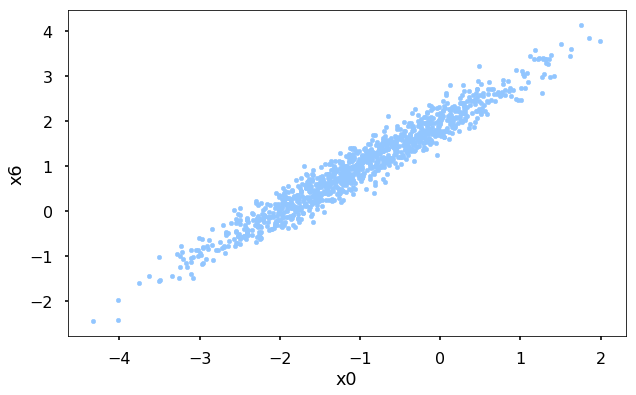

In [7]:
data_raw.plot('x0', 'x6',kind='scatter', figsize=(10,6))
plt.show()

In fact, the scatter plot demonstrated its correlations. Now let's take a look the frequency distribution of data. A histogram is a clever way to visualize it.

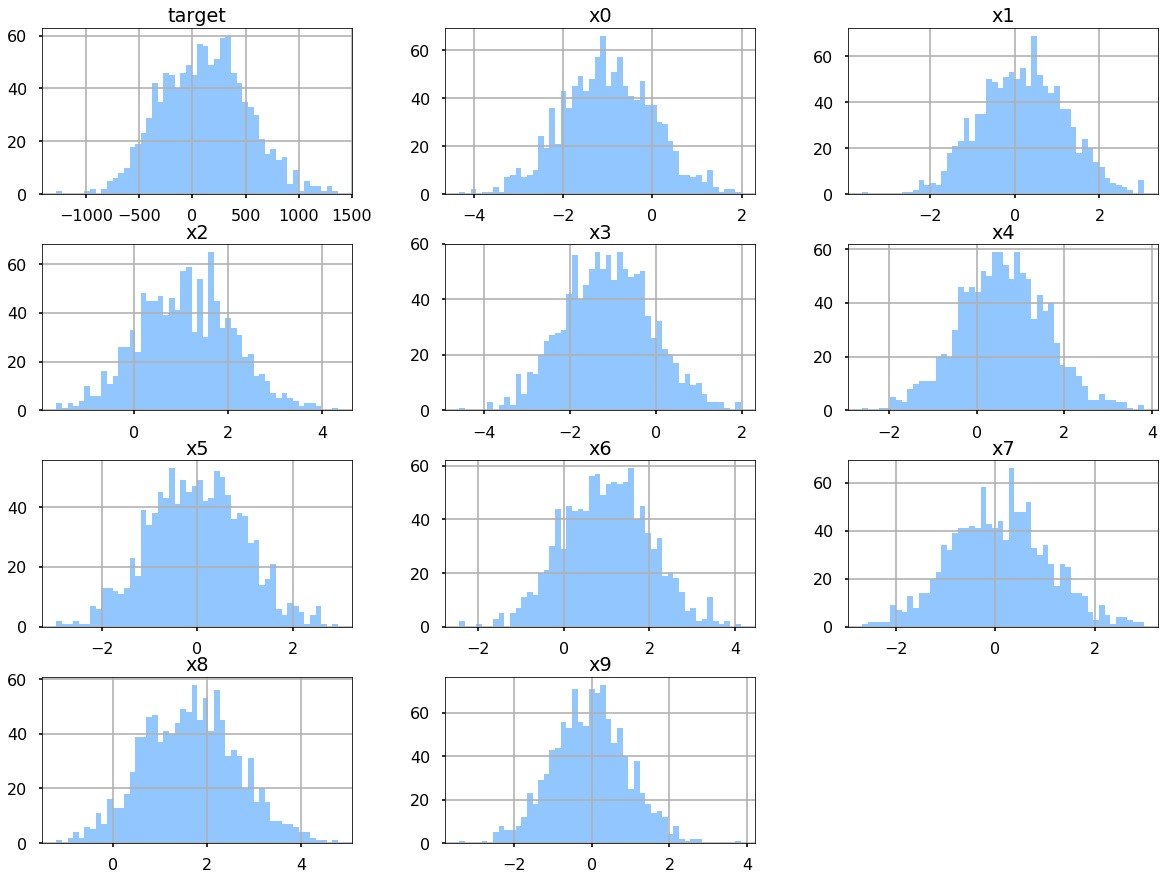

In [8]:
data_raw.hist(bins=50, figsize=(20,15))
plt.show()

Interisting...all features seems to be operating under a Gaussian distribuition, dispite some noite. It means we might try a model for regression using Gaussian functions.

# Data preparation

First, let's randomly set aside 20% of samples to for further testing. This is often called a hold-out test set.

In [9]:
from sklearn.model_selection import train_test_split

data_raw_train, data_raw_teste = train_test_split(data_raw, test_size=0.2)

data_raw_teste.to_csv('regressao_Q6__test.csv')

NOTE: we only have **one** target and no categories in our feature, so there is no problem with randomly assign samples for the test set. However, it is import to use Stratified Sampling in order to avoid Sampling bias. That could comprimise integrity of the model.

## Standardization

A "strong" way to standardize this set is using the statistical normalization, by removing the mean and dividing by the standard deviation. In this way all feature are going to have unit variance and zero mean.

In [10]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_raw_train_std = std_scaler.fit_transform(data_raw_train.values)

In [11]:
X_train = data_raw_train_std[:,:-1]
y = data_raw_train_std[:,-1]

In [12]:
print('Unit variance of features: ', X_train.var(axis=0))

Unit variance of features:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Train models

We accualy don't know each model are going to performe well on our data. Let's try a few, but if conscience. First,  we are going to pick in the following order one linear models, a ensemble method, and if **necessary**  a non-linear. Remember: Occam's razor principle!

First, we are going to pick three regressors to see how they perform. Then, we are going to think about grid-searching and fine tuning they hyperparameters.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

The choices are: linear Regression, since it the most simple method, based on Ordinary Least Squares (OLS); SGD is similar OLS, but its training is optmized by gradient descent; And, random forest classifier, it is sure not linear, but it a different approach, based on decision trees;

We also need to chose a metric for evaluation. In most regression it is commom to use the Root Mean Squared Error (RMSE) of predicitons. That's is going to be our choice. By the way, a clever way is use cross-validation in all our experiments.

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
ols_reg = LinearRegression()
sgd_reg = SGDRegressor(max_iter=1000)
rf_reg = RandomForestRegressor()

As said before, no need to worry about hyperparameters tunning **right now**. Scikit-learn has proper values by default.

In [16]:
scores_ols_reg = cross_val_score(ols_reg, X_train, y, scoring='neg_mean_squared_error', cv=10)
scores_sgd_reg = cross_val_score(sgd_reg, X_train, y, scoring='neg_mean_squared_error', cv=10)
scores_rf_reg = cross_val_score(rf_reg, X_train, y, scoring='neg_mean_squared_error', cv=10)

cross_val_score function does not have by default RMSE implemented, since the scorgin attribute pass its argument to a optmizer to maximize score, but how intention is to MINIMIZE score, so we are going to arrange the results. Let's take a look how they performed.

In [17]:
def rmse_score(input):
    return np.sqrt(-input)

print('OLS regression average result: {}'.format(rmse_score(scores_ols_reg).mean()))
print('SGD regression average result: {}'.format(rmse_score(scores_sgd_reg).mean()))
print('Random Forest regression average result: {}'.format(rmse_score(scores_rf_reg).mean()))

OLS regression average result: 0.06728684029814254
SGD regression average result: 0.06731522434262756
Random Forest regression average result: 0.14598967013842573


How..turns out SGD and OLS perfomed better. I'm a bit curious about something: OLS is based on matrix inversion, and this can be numerical complicated to do when we have more samples than attributes. A solution is to regularize our model by an approach, such as Tikhonov. Fortunatelly, sklearn has already implemented :) it is called "Ridge regression". Let's see how it goes.

In [18]:
from sklearn.linear_model import Ridge

ols_tik_reg = Ridge(alpha=0.5)
scores_ols_tik_reg = cross_val_score(ols_tik_reg, X_train, y, scoring='neg_mean_squared_error', cv=10)
print('OLS-regularized regression average result: {}'.format(rmse_score(scores_ols_tik_reg).mean()))

OLS-regularized regression average result: 0.0672795888692556


Aw...a bit of improvement. Let's keep it simple. Remember when said variable seemed to be Gaussian distributed? Let's try a Gaussian regressor and see how it goes. 

In [40]:
data_raw.shape

(1100, 11)

In [50]:
loo.get_n_splits(x_new)

1100

In [41]:
x_new = std_scaler.fit_transform(data_raw.drop('target', axis=1).values)
y = data_raw['target']

In [56]:
from sklearn import metrics


In [68]:
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics

loo = LeaveOneOut()
loo.get_n_splits(x_new)

results_train = []
results_test = []
i=0
for train_index, test_index in loo.split(x_new):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x_new[train_index], x_new[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, X_test, y_train, y_test)
    ols_tik_reg = Ridge(random_state=42,alpha=1.7)

    ols_tik_reg.fit(X_train,y_train)
    
    y_pred_train = ols_tik_reg.predict(X_train)
    y_pred_test = ols_tik_reg.predict(X_test)
    
    results_train.append(np.sqrt(metrics.regression.mean_squared_error(y_train,y_pred_train)))
    results_test.append(np.sqrt(metrics.regression.mean_squared_error(y_test,y_pred_test)))
        

In [69]:
np.mean(results_train)

27.431862261575162

In [70]:
np.mean(results_test)

22.058582214477344

In [53]:
x_new = std_scaler.fit_transform(data_raw.drop('target', axis=1).values)
y = data_raw['target']

In [54]:
scores_ols_tik_reg = cross_val_score(ols_tik_reg, x_new, y, scoring='neg_mean_squared_error', cv=1100)
print('OLS-regularized regression average result: {}'.format(rmse_score(scores_ols_tik_reg).mean()))

OLS-regularized regression average result: 22.058582214477344


In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor

gauss_reg = GaussianProcessRegressor()

scores_gauss_reg = cross_val_score(gauss_reg, X_train, y, scoring='neg_mean_squared_error', cv=10)
print('Gaussian regression average result: {}'.format(rmse_score(scores_gauss_reg).mean()))

Gaussian regression average result: 0.2403509633478857


Not very good...we could try to use diferent kernels (i.e. different estimative for the covariance matrix), but linear model seem to be more promissing. Let's invest on finetuning SGD, if we have and improvement we drop OLS out.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
            {'eta0': [0.2, 0.1, 0.001, 0.0001], 'power_t': [0.5, 1],
            'n_iter': [100, 500, 1000]}]

grid_search_sgd = GridSearchCV(ml, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1)

grid_search_sgd.fit(X_train, y)

NameError: name 'ml' is not defined

In [21]:
print('SGD regression best result: {}'.format(rmse_score(grid_search_sgd.best_score_)))

SGD regression best result: 0.06871037435439598


Turns out we already had achieved out "proper" hyperameter tuning...

In [22]:
ols_reg.fit(X_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
y_plot_sgd = grid_search_sgd.predict(X_train)
y_plot_ols = ols_reg.predict(X_train)

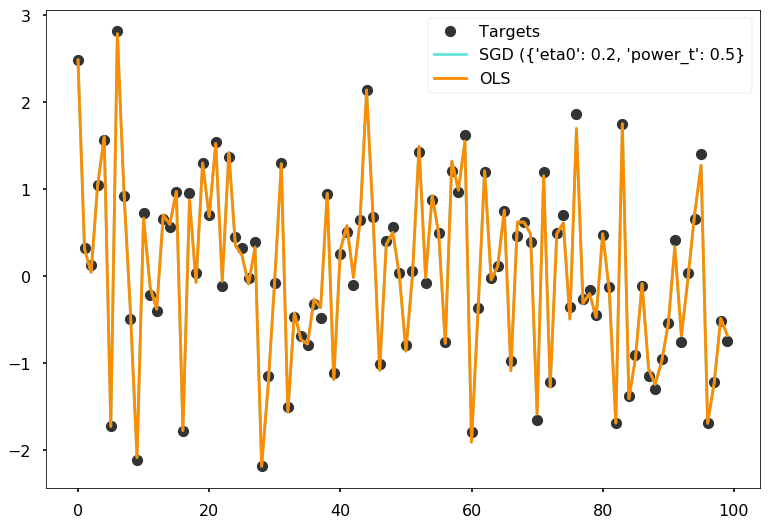

In [24]:
plt.plot(y[:100], 'ko', alpha=0.8, label='Targets')
plt.plot(y_plot_sgd[:100], color='turquoise', alpha=0.8, label='SGD ({}'.format(grid_search_sgd.best_params_))
plt.plot(y_plot_ols[:100], color='darkorange', label='OLS')
plt.legend(loc='upper right')
plt.show()

Ouch!!! Overfitting???

Let's take a look in just one of features x  targets and see how our model is perfomin in that subspace.

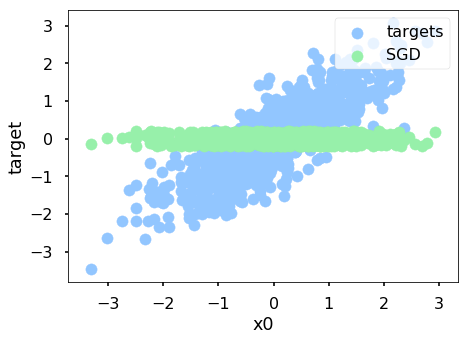

In [32]:
x0_plot = np.linspace(-3,3,X_train[:,0].shape[0])
y_plot_sgd_x0 = grid_search_sgd.best_estimator_.coef_[0]*x0_plot + grid_search_sgd.best_estimator_.intercept_

plt.figure(figsize=(7,5))
plt.scatter(X_train[:,0],y, label='targets')
plt.scatter(X_train[:,0],y_plot_sgd_x0, label='SGD')
plt.legend(loc='upper right')
plt.xlabel('x0')
plt.ylabel('target')
plt.show()

Doesn't seem very good. We see there is a posivite correlation between target and x0. Lets retrain SGD with only this feature.

In [ ]:
sgd_reg_x0 = SGDRegressor(max_iter=1000)
sgd_reg_x0.fit(X_train[:,0].reshape((X_train[:,0].shape[0],1)), y)

scores_sgd_reg_x0 = cross_val_score(sgd_reg_x0, X_train[:,0].reshape((X_train[:,0].shape[0],1)), y,
                                   scoring='neg_mean_squared_error', cv=10)

In [ ]:
y_plot_sgd_x0 = sgd_reg_x0.coef_[0]*x0_plot + sgd_reg_x0.intercept_

plt.scatter(X_train[:,0],y, label='targets')
plt.plot(x0_plot,y_plot_sgd_x0, 'k', label='SGD - RMSE: {}'.format(rmse_score(scores_sgd_reg_x0).mean()))
plt.legend(loc='upper right')
plt.xlabel('x0')
plt.ylabel('target')
plt.show()

Our RMSE rised up from 0.07 to 0.54. It seems worse, but we can't conclude anything until we try on our test set. Let's do it.

# Running on test set

In [ ]:
data_test = pd.read_csv('regressao_Q6__test.csv')
data_test.head()

In [ ]:
data_test.drop(['Unnamed: 0'], axis=1, inplace=True)

We have to submited to the same standardization object we did during our training.

In [ ]:
data_test_std = std_scaler.transform(data_test)

Now, let's fed in our model!

In [ ]:
X_test = data_test_std[:,:-1]
y_test_target = data_test_std[:,-1]

y_pred = sgd_reg.predict(X_test)
y_pred_x0 = sgd_reg_x0.predict(X_test[:,0].reshape((X_test[:,0].shape[0],1)))

In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE in test set with SGD and all features: {}'.format(np.sqrt(mean_squared_error(y_test_target,y_pred))))
print('RMSE in test set with SGD with only x0: {}'.format(np.sqrt(mean_squared_error(y_test_target,y_pred_x0))))